In [1]:
!pip install Biopython

     |████████████████████████████████| 2.3MB 6.0MB/s 


In [0]:
import itertools
from datetime import datetime
from Bio import SeqIO
import numpy as np
import pandas as pd

In [0]:
sequences = [s for s in SeqIO.parse("aligned_sequence.fasta", "fasta")]
metadata = pd.read_csv("metadata.tsv",sep="\t",parse_dates=["Collection Date"])

In [4]:
metadata = metadata.sort_values(by=['Collection Date'], ascending=True)
metadata.head()

,Name,Sequence Accession,Complete Genome,Segment,Segment Length,Subtype,Collection Date,Host Species,Country,State/Province,Flu Season,Strain Name,Unnamed: 12
430,HA,MF535113,No,4,1701,H1N1,2009-01-01,IRD:Human,India,-N/A-,-N/A-,A/Jodhpur/1316/2009,NaN
125,HA,HM204566,No,4,1769,H1N1,2009-06-01,IRD:Human,India,-N/A-,-N/A-,A/Delhi/NIV57/2009,NaN
489,HA,HM204567,No,4,1709,H1N1,2009-06-01,IRD:Human,India,-N/A-,-N/A-,A/Mum/NIV261/2009,NaN
504,HA,CY075901,No,4,1760,H1N1,2009-06-21,IRD:Human,India,-N/A-,-N/A-,A/Pune/NIV161/2009,NaN
86,HA,CY075914,No,4,1756,H1N1,2009-06-27,IRD:Human,India,-N/A-,-N/A-,A/Che/NIV246/2009,NaN


In [0]:
metadata.iloc[542:,:]  # data for testing

In [0]:
metadata = metadata[metadata['Host Species'] == 'IRD:Human']

#Training data
training_metadata = metadata[metadata['Collection Date'] < datetime(2018, 1, 1)]
training_idxs = [i for i, s in enumerate(sequences) if s.id[3:11] in training_metadata['Sequence Accession'].values]

#Testing data
test_metadata = metadata[metadata['Collection Date'] >= datetime(2018, 1, 1)]
test_idxs = [i for i, s in enumerate(sequences) if s.id[3:11] in test_metadata['Sequence Accession'].values]

training_sequences = [sequences[i][30:1737] for i in training_idxs]
test_sequences = [sequences[i][30:1737] for i in test_idxs]

In [8]:
print(len(training_idxs))
print(len(test_idxs))

542
9


In [0]:
codes = {'A':0.05, 'C':0.10, 'D':0.15, 'E':0.20, 'F':0.25, 'G':0.30, 'H':0.35, 'I':0.40, 'K':0.45, 'L':0.50,'M':0.55, 'N':0.60, 'P':0.65, 'Q':0.70, 'R':0.75, 'S':0.80, 'T':0.85, 'V':0.90, 'W':0.95, 'Y':1, '-':0.00}

train_data = []
for row in training_sequences:
  temp = []
  for amino_acid in row:
    temp.append(codes.get(amino_acid,0))
  train_data.append(temp)
train_data=np.array(train_data)

In [9]:
train_data.shape

(542, 1707)

In [0]:
protVec = pd.read_csv("protVec_100d_3grams.csv",sep="\t")
protDict = {}
for i in range(len(protVec)-1):
    protDict[protVec.iloc[i][0].replace('X','-')]=(list(protVec.iloc[i][1:]))
protDict['---']=(list(protVec.iloc[9047][1:]))

In [0]:
X=[]
Y=[]
for i in range(500):
  X.append(training_sequences[i])
  Y.append(training_sequences[i+1])

In [0]:
X_test=[]
Y_test=[]
for i in range(500,len(training_sequences)-1):
  X_test.append(training_sequences[i])
  Y_test.append(training_sequences[i+1])

In [0]:
X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [66]:
import itertools
X_test=[]
Y_test=[]
for row in X:
  temp=[]
  for i in range(0,568):
    temp.append(protDict[row[3*i:3*i+3]])
  X_test.append(list(itertools.chain.from_iterable(temp)))

for row in Y:
  temp=[]
  for i in range(0,568):
    temp.append(protDict[row[3*i:3*i+3]])
  Y_test.append(list(itertools.chain.from_iterable(temp)))

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


In [21]:
X[1:].shape

(499, 1707)

In [24]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

model.add(LSTM(128, input_shape=(1707),return_sequences=True))
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(1707, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(X,Y,epochs=3,validation_data=(X_test, Y_test))



TypeError: ignored

In [0]:
#importing data from tensorflow database
import tensorflow as tf

mnist = tf.keras.datasets.mnist  
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

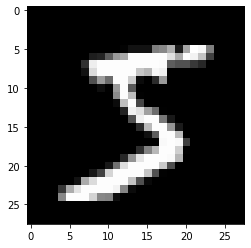

In [57]:
# test if the the correct input is downloaded or not
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [0]:
#normalise the data input vector
x_train = x_train/255.0
x_test = x_test/255.0

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [47]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 224s 4ms/step - loss: 0.3986 - accuracy: 0.8784 - val_loss: 0.1281 - val_accuracy: 0.9622
Epoch 2/3
60000/60000 [==============================] - 223s 4ms/step - loss: 0.1239 - accuracy: 0.9673 - val_loss: 0.0809 - val_accuracy: 0.9769
Epoch 3/3
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0850 - accuracy: 0.9775 - val_loss: 0.0602 - val_accuracy: 0.9835


In [0]:
# to flat array
def flat_array(array):
  return list(itertools.chain.from_iterable(array))
x_train_flat = list(map(flat_array, x_train))
x_test_flat = list(map(flat_array, x_test))

In [60]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', 
                    activation='relu', 
                    alpha=1e-5, 
                    max_iter=3,
                    hidden_layer_sizes=(128,32), 
                    random_state=1, 
                    learning_rate='adaptive', 
                    early_stopping=True, 
                    validation_fraction=0.2,
                    verbose=True)

clf.fit(x_train_flat, y_train)

Iteration 1, loss = 0.50049868
Validation score: 0.936583
Iteration 2, loss = 0.18070715
Validation score: 0.953083
Iteration 3, loss = 0.12885425
Validation score: 0.962167


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(128, 32), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=3, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.2, verbose=True, warm_start=False)

In [65]:
Y_pred_RNN=model.predict(x_test)

print("With tensorflow RNN")
print(model.evaluate(x_test, y_test, batch_size=128))

With tensorflow RNN
10000/10000 [==============================] - 1s 106us/step
[0.06015608089715242, 0.9835000038146973]


With Sklearn MLP classifier
[[ 968    0    1    1    0    3    4    1    1    1]
 [   0 1118    3    0    1    1    4    1    7    0]
 [   7    2  981   11    4    1    5    8   12    1]
 [   1    2    6  961    0   14    1    8   13    4]
 [   1    0    4    1  944    0   10    3    4   15]
 [   7    0    0    9    0  860    8    2    5    1]
 [   7    3    0    1    5   11  927    1    3    0]
 [   2    6   13    8    3    0    0  980    2   14]
 [   4    1    2   12    3    4    9    5  930    4]
 [   3    6    2    8   11    3    1    9    6  960]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.96       958
        

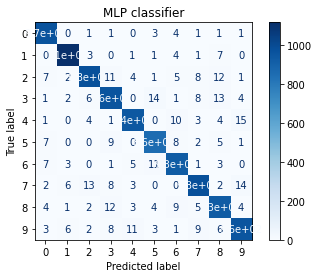

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Y_pred_MLP=clf.predict(x_test_flat)

print("With Sklearn MLP classifier")
print(confusion_matrix(y_test, Y_pred_MLP))
print(classification_report(y_test, Y_pred_MLP))
disp = plot_confusion_matrix(clf, x_test_flat, y_test,
                             cmap=plt.cm.Blues,
                             normalize=None
                             )
disp.ax_.set_title('MLP classifier')
print(disp.confusion_matrix)
plt.show()